In [101]:
import pandas as pd
import glob
import datetime
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t

In [129]:
# Read all data
files = glob.glob(r'C:\Users\felix\PycharmProjects\SnP\data\pyfinancialdata\data\stocks\histdata\GRXEUR\*.csv')
files

['C:\\Users\\felix\\PycharmProjects\\SnP\\data\\pyfinancialdata\\data\\stocks\\histdata\\GRXEUR\\DAT_ASCII_GRXEUR_M1_2010.csv',
 'C:\\Users\\felix\\PycharmProjects\\SnP\\data\\pyfinancialdata\\data\\stocks\\histdata\\GRXEUR\\DAT_ASCII_GRXEUR_M1_2011.csv',
 'C:\\Users\\felix\\PycharmProjects\\SnP\\data\\pyfinancialdata\\data\\stocks\\histdata\\GRXEUR\\DAT_ASCII_GRXEUR_M1_2012.csv',
 'C:\\Users\\felix\\PycharmProjects\\SnP\\data\\pyfinancialdata\\data\\stocks\\histdata\\GRXEUR\\DAT_ASCII_GRXEUR_M1_2013.csv',
 'C:\\Users\\felix\\PycharmProjects\\SnP\\data\\pyfinancialdata\\data\\stocks\\histdata\\GRXEUR\\DAT_ASCII_GRXEUR_M1_2014.csv',
 'C:\\Users\\felix\\PycharmProjects\\SnP\\data\\pyfinancialdata\\data\\stocks\\histdata\\GRXEUR\\DAT_ASCII_GRXEUR_M1_2015.csv',
 'C:\\Users\\felix\\PycharmProjects\\SnP\\data\\pyfinancialdata\\data\\stocks\\histdata\\GRXEUR\\DAT_ASCII_GRXEUR_M1_2016.csv',
 'C:\\Users\\felix\\PycharmProjects\\SnP\\data\\pyfinancialdata\\data\\stocks\\histdata\\GRXEUR\\DAT_ASC

In [132]:
# read first file
file_path = files.pop(0)
df_file = pd.read_csv(file_path, sep=';', header=None)
df_file[0] = pd.to_datetime(df_file[0])
df_file['minute_average'] = (df_file[1] + df_file[4])/2

for file_path in files:
    _df_file = pd.read_csv(file_path, sep=';', header=None)
    _df_file[0] = pd.to_datetime(_df_file[0])
    _df_file['minute_average'] = (_df_file[1] + _df_file[4])/2
    
    df_file = pd.concat([df_file, _df_file])
    
df_file

,0,1,2,3,4,5,minute_average
0,2012-01-02 02:00:00,5895.50,5895.50,5895.50,5895.50,0,5895.500
1,2012-01-02 02:18:00,5894.75,5895.25,5893.75,5894.75,0,5894.750
2,2012-01-02 02:19:00,5894.50,5896.00,5893.50,5895.25,0,5894.875
3,2012-01-02 02:20:00,5895.50,5895.50,5892.00,5892.75,0,5894.125
4,2012-01-02 02:21:00,5892.25,5892.25,5891.25,5891.75,0,5892.000
...,...,...,...,...,...,...,...
213268,2018-12-28 16:09:00,10571.41,10573.61,10570.91,10572.01,0,10571.710
213269,2018-12-28 16:10:00,10570.91,10573.11,10565.41,10565.41,0,10568.160
213270,2018-12-28 16:11:00,10566.51,10566.51,10561.01,10566.51,0,10566.510
213271,2018-12-28 16:12:00,10565.41,10566.51,10564.31,10565.41,0,10565.410


In [26]:
# 2010
path_2010 = r'C:\Users\felix\PycharmProjects\SnP\data\pyfinancialdata\data\stocks\histdata\SPXUSD\DAT_ASCII_SPXUSD_M1_2010.csv'
df_2010 = pd.read_csv(path_2010, sep=';', header=None)
# df_2010.index.name = 'date'
df_2010[0] = pd.to_datetime(df_2010[0])
df_2010['minute_average'] = (df_2010[1] + df_2010[4])/2
df_2010.sort_index(inplace=True, axis=0)
df_2010

,0,1,2,3,4,5,minute_average
0,2010-11-14 18:00:00,1195.50,1195.75,1195.50,1195.75,0,1195.625
1,2010-11-14 18:01:00,1195.50,1195.75,1195.50,1195.50,0,1195.500
2,2010-11-14 18:02:00,1195.25,1195.50,1195.00,1195.25,0,1195.250
3,2010-11-14 18:03:00,1195.50,1195.50,1195.50,1195.50,0,1195.500
4,2010-11-14 18:04:00,1195.75,1195.75,1195.50,1195.75,0,1195.750
...,...,...,...,...,...,...,...
29003,2010-12-31 14:51:00,1254.25,1254.25,1254.25,1254.25,0,1254.250
29004,2010-12-31 14:52:00,1254.00,1254.00,1254.00,1254.00,0,1254.000
29005,2010-12-31 14:53:00,1253.75,1254.00,1253.75,1253.75,0,1253.750
29006,2010-12-31 14:55:00,1254.00,1254.25,1253.75,1254.25,0,1254.125


In [133]:
df_file.iloc[0][0], df_file.iloc[-1][0]

(Timestamp('2012-01-02 02:00:00'), Timestamp('2018-12-28 16:13:00'))

In [134]:
df_2010 = df_file

In [135]:
# 20101114 180300
days = []
time_start = df_2010.iloc[0][0]

current_time = time_start
next_time = time_start + datetime.timedelta(hours=24)

prices = []
current_index = 0
for i in tqdm(range(len(df_2010)), total=len(df_2010)):
    if df_2010.iloc[i][0] >= next_time:
        # days.append(prices)
        days.append(df_2010.iloc[current_index:i])
        # prices = []
        next_time = next_time + datetime.timedelta(hours=24)
        current_index = i
    # else:
        # prices.append(df_2010.iloc[i]['minute_average'].item())   
    

100%|██████████| 1478233/1478233 [03:31<00:00, 6978.18it/s]


In [146]:
# create the cutpoints
means = []
for day_data in tqdm(days, total=len(days)):
    # print(day_data.head())
    time_start = day_data.iloc[0][0]
    
    # print(time_start)
    
    # Get the date of the next day
    next_day = time_start + datetime.timedelta(days=1)
    next_day_date = next_day.date()
    
    # Combine the date of the next day with the time 12:00
    next_day_12 = datetime.datetime.combine(time_start.date(), datetime.time(minute=30)) + datetime.timedelta(hours=13)
    # print(next_day_12)
    
    # only keep the data after 12:00
    data_after_12 = day_data[day_data[0] > next_day_12]
    
    # data after 14:30
    next_day_14 = datetime.datetime.combine(time_start.date(), datetime.time(minute=30)) + datetime.timedelta(hours=14)
    data_after_12 = data_after_12[data_after_12[0] < next_day_14]
    data_after_14_30 = day_data[day_data[0] > next_day_14]

    next_day_15 = datetime.datetime.combine(time_start.date(), datetime.time(minute=30)) + datetime.timedelta(hours=15)
    data_after_14_30 = data_after_14_30[data_after_14_30[0] < next_day_15]
    data_after_15_30 = day_data[day_data[0] > next_day_15]
    
    next_day_16 = datetime.datetime.combine(time_start.date(), datetime.time(minute=30)) + datetime.timedelta(hours=16)
    data_after_15_30 = data_after_15_30[data_after_15_30[0] < next_day_16]
    
    average_before = data_after_12['minute_average'].mean()
    average_14 = data_after_14_30['minute_average'].mean()
    average_15 = data_after_15_30['minute_average'].mean()
    
    # print(average_before, average_14, average_15)
    # break
    if float('nan') not in [average_before, average_14, average_15] and np.nan not in [average_before, average_14, average_15]:
        means.append((average_before, average_14, average_15))

100%|██████████| 2552/2552 [00:08<00:00, 308.94it/s]


In [148]:
# compute difference in means
df = pd.DataFrame(means)
df.columns = ['12', '14', '15']

df['delta_14'] = df['14'] - df['12']
df['delta_15'] = df['15'] - df['14']
df['delta_15_12'] = df['15'] - df['12']

<AxesSubplot:ylabel='delta_14'>

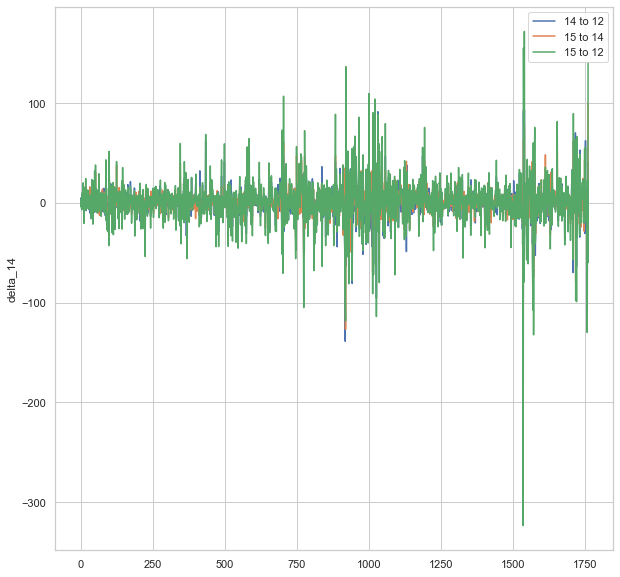

In [155]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# sns.lineplot(df, x=df.index, y='12', ax=ax, label='12')
# sns.lineplot(df, x=df.index, y='14', ax=ax, label='14')
# sns.lineplot(df, x=df.index, y='15', ax=ax, label='15')
sns.lineplot(df, x=df.index, y='delta_14', ax=ax, label='14 to 12')
sns.lineplot(df, x=df.index, y='delta_15', ax=ax, label='15 to 14')
sns.lineplot(df, x=df.index, y='delta_15_12', ax=ax, label='15 to 12')

In [156]:
# 
df['average_post_intervention'] = df['12'] - 0.5*(df['14'] + df['15'])
df['positive'] = False
df['positive'][df['average_post_intervention'] >= 0] = True

df

C:\Users\felix\AppData\Local\Temp\ipykernel_7148\327408868.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['positive'][df['average_post_intervention'] >= 0] = True


,12,14,15,delta_14,delta_15,delta_15_12,average_post_intervention,positive
0,6065.670455,6064.932692,6061.983696,-0.737762,-2.948997,-3.686759,2.212261,True
1,6156.010593,6161.125000,6159.599138,5.114407,-1.525862,3.588545,-4.351476,False
2,6131.241525,6131.146186,6130.556034,-0.095339,-0.590152,-0.685491,0.390415,True
3,6133.529661,6127.750000,6126.586207,-5.779661,-1.163793,-6.943454,6.361558,True
4,6057.309322,6057.385593,6052.875000,0.076271,-4.510593,-4.434322,2.179025,True
...,...,...,...,...,...,...,...,...
1755,10769.489661,10747.603051,10755.047500,-21.886610,7.444449,-14.442161,18.164386,True
1756,10778.386102,10690.834576,10648.502045,-87.551525,-42.332531,-129.884056,108.717791,True
1757,10525.074237,10539.593559,10548.297500,14.519322,8.703941,23.223263,-18.871292,False
1758,10576.241017,10555.353220,10516.274773,-20.887797,-39.078448,-59.966244,40.427020,True


In [157]:
df_positive = df[df['positive'] == True]
df_negative = df[df['positive'] == False]

H_0: μ_X − μ_Y = 0

## Negative

In [168]:
print('relative values - Negative News')
# estimating global variance
# global_variance = df_negative[['12', '14', '15']].values.reshape(-1).var()
global_variance = df_negative[['delta_14']].values.reshape(-1).var()
global_variance2 = df_negative[['delta_15']].values.reshape(-1).var()
global_variance3 = df_negative[['delta_15_12']].values.reshape(-1).var()
# global_expectation = df_negative[['12', '14', '15']].values.reshape(-1).mean()
dof = 2*len(df_negative) - 2
print('degree of Freedom:', dof)

mean_12 = df_negative['delta_14'].mean()
mean_14 = df_negative['delta_15'].mean()
mean_15 = df_negative['delta_15_12'].mean()
# mean_15 = df_negative['15'].mean()

t = (mean_12 - 0) / (global_variance * np.sqrt(len(df_negative)))
print('')
print('Mu 𝞓(14:30-13:30) = 0')
print('t:', t)
t = (mean_14 - 0) / (global_variance2 * np.sqrt(len(df_negative)))
print('')
print('Mu 𝞓(15:30-14:30) = 0')
print('t:', t)
print('')
t = (mean_15 - 0) / (global_variance3 * np.sqrt(len(df_negative)))
print('Mu 𝞓(15:30-13:30) = 0')
print('t:', t)
print('')

relative values - Negative News
degree of Freedom: 1972

Mu 𝞓(14:30-13:30) = 0
t: 0.002156234285126481

Mu 𝞓(15:30-14:30) = 0
t: 0.001252458833373733

Mu 𝞓(15:30-13:30) = 0
t: 0.0014289580209033274


In [172]:
# estimating global variance
global_variance = df_negative[['12', '14', '15']].values.reshape(-1).var()
# global_variance = df_negative[['delta_14', 'delta_15']].values.reshape(-1).var()
# global_expectation = df_negative[['12', '14', '15']].values.reshape(-1).mean()
dof = 2*len(df_negative) - 2
print('dof:', dof)

mean_12 = df_negative['12'].mean()
mean_14 = df_negative['14'].mean()
mean_15 = df_negative['15'].mean()

t_14_12 = (mean_12 - mean_14 - 0) / (global_variance * (2/len(df_negative)))
print('Mu 14:30 = Mu 13:30')
print('t =', t_14_12)
# print('p_value:', 2*(1 - t.cdf(abs(t_14_12), dof)))
print('')

t_15_12 = (mean_12 - mean_15 - 0) / (global_variance * (2/len(df_negative)))
print('Mu 15:30 = Mu 13:30')
print('t =', t_15_12)
# print('p_value:', 2*(1 - t.cdf(abs(t_15_12), dof)))
print('')

t_15_14 = (mean_14 - mean_15 - 0) / (global_variance * (2/len(df_negative)))
print('Mu 15:30 = Mu 14:30')
print('t =', t_15_14)
# print('p_value:', 2*(1 - t.cdf(abs(t_15_14), dof)))
print('')

dof: 1972
Mu 14:30 = Mu 13:30
t = -0.001068137577498917

Mu 15:30 = Mu 13:30
t = -0.0018055627178603215

Mu 15:30 = Mu 14:30
t = -0.0007374251403614045


## Positive

In [173]:
print('relative values - Positive News')
# estimating global variance
# global_variance = df_negative[['12', '14', '15']].values.reshape(-1).var()
global_variance = df_positive[['delta_14']].values.reshape(-1).var()
global_variance2 = df_positive[['delta_15']].values.reshape(-1).var()
global_variance3 = df_positive[['delta_15_12']].values.reshape(-1).var()
# global_expectation = df_negative[['12', '14', '15']].values.reshape(-1).mean()
dof = 2*len(df_positive) - 2
print('degree of Freedom:', dof)

mean_12 = df_positive['delta_14'].mean()
mean_14 = df_positive['delta_15'].mean()
mean_15 = df_positive['delta_15_12'].mean()
# mean_15 = df_negative['15'].mean()

t = (mean_12 - 0) / (global_variance * np.sqrt(len(df_positive)))
print('')
print('Mu 𝞓(14:30-13:30) = 0')
print('t:', t)
t = (mean_14 - 0) / (global_variance2 * np.sqrt(len(df_positive)))
print('')
print('Mu 𝞓(15:30-14:30) = 0')
print('t:', t)
print('')
t = (mean_15 - 0) / (global_variance3 * np.sqrt(len(df_positive)))
print('Mu 𝞓(15:30-13:30) = 0')
print('t:', t)
print('')

relative values - Positive News
degree of Freedom: 1544

Mu 𝞓(14:30-13:30) = 0
t: -0.001836458282648327

Mu 𝞓(15:30-14:30) = 0
t: -0.0007966471929914725

Mu 𝞓(15:30-13:30) = 0
t: -0.001092008777362991


In [174]:
# estimating global variance
global_variance = df_positive[['12', '14', '15']].values.reshape(-1).var()
# global_expectation = df_negative[['12', '14', '15']].values.reshape(-1).mean()
dof = 2*len(df_positive) - 2
print('dof:', dof)

mean_12 = df_positive['12'].mean()
mean_14 = df_positive['14'].mean()
mean_15 = df_positive['15'].mean()

t_14_12 = (mean_12 - mean_14 - 0) / (global_variance * (2/len(df_positive)))
print('Mu 14:30 = Mu 13:30')
print('t =', t_14_12)
# print('p_value:', 2*(1 - t.cdf(abs(t_14_12), dof)))
print('')

t_15_12 = (mean_12 - mean_15 - 0) / (global_variance * (2/len(df_positive)))
print('Mu 15:30 = Mu 13:30')
print('t =', t_15_12)
# print('p_value:', 2*(1 - t.cdf(abs(t_15_12), dof)))
print('')

t_15_14 = (mean_14 - mean_15 - 0) / (global_variance * (2/len(df_positive)))
print('Mu 15:30 = Mu 14:30')
print('t =', t_15_14)
# print('p_value:', 2*(1 - t.cdf(abs(t_15_14), dof)))
print('')


dof: 1544
Mu 14:30 = Mu 13:30
t = 0.0009042719603236996

Mu 15:30 = Mu 13:30
t = 0.0013825644837252222

Mu 15:30 = Mu 14:30
t = 0.0004782925234015227
